In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [15]:
data = pd.read_csv('diabetes1.csv')
data = data.drop(columns='Unnamed: 0',axis=0)

In [16]:
df = data.copy()

In [17]:
newdf1 = df[df['Outcome'] == 0].sample(268)

In [18]:
newdf2 = df[df['Outcome'] == 1 ]

In [19]:
df = pd.concat([newdf1, newdf2])

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
335,0,165.0,76.0,43.00000,255.000000,47.9,0.259,26,0
383,1,90.0,62.0,18.00000,59.000000,25.1,1.268,25,0
82,7,83.0,78.0,26.00000,71.000000,29.3,0.767,36,0
167,4,120.0,68.0,29.15342,155.548223,29.6,0.709,34,0
725,4,112.0,78.0,40.00000,155.548223,39.4,0.236,38,0
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,29.15342,155.548223,36.3,0.258,52,1
759,6,190.0,92.0,29.15342,155.548223,35.5,0.278,66,1
761,9,170.0,74.0,31.00000,155.548223,44.0,0.403,43,1


In [21]:
df.shape

(536, 9)

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
y = df['Outcome']
X = df.drop(columns='Outcome')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

In [26]:
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (428, 8)
train size y :  (428,)
test size X :  (108, 8)
test size y :  (108,)


In [27]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [28]:
y_train.value_counts(normalize=True)

Outcome
1    0.511682
0    0.488318
Name: proportion, dtype: float64

In [29]:
class_weight = {0: 1.530612244897959, 1: 2.8793103448275863}
model = LogisticRegression(class_weight=class_weight,solver='liblinear',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.530612244897959, 1: 2.8793103448275863},
                   max_iter=1000, solver='liblinear')

In [30]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, model.predict(X_test))
print("F1 score for the base model is:", f1)

F1 score for the base model is: 0.7241379310344828


In [31]:
from sklearn.model_selection import cross_val_score
k = 5  # You can choose a different number of folds
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Cross-validation scores: [0.64814815 0.77570093 0.76635514 0.72897196 0.76635514]
Mean Accuracy: 0.7371062651436483
Standard Deviation: 0.04728690167146576


In [32]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

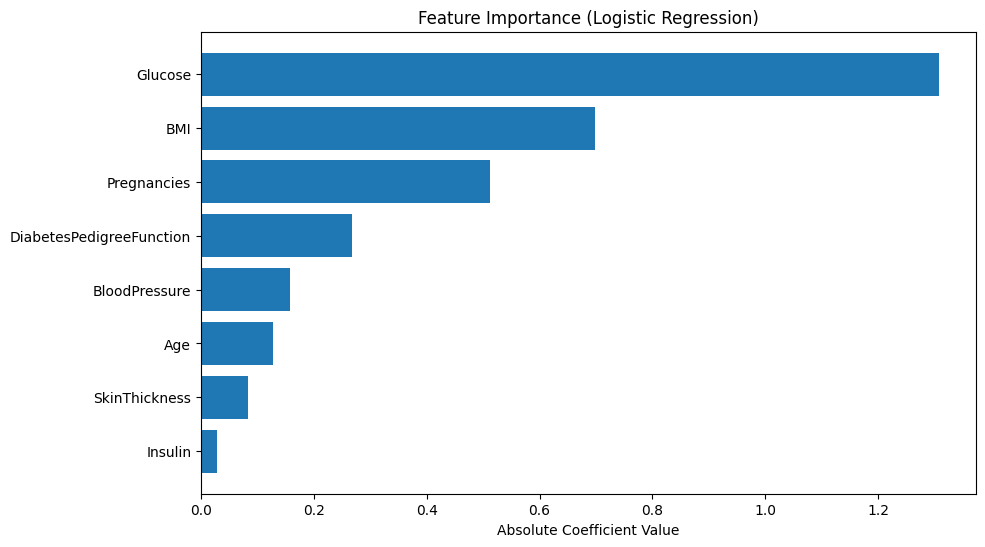

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model called 'model'
# and X_train contains your training feature matrix

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Calculate the absolute magnitude of coefficients
absolute_coefficients = np.abs(coefficients)

# Define feature names manually or access them from wherever you defined them
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']  # Replace with your actual feature names

# Sort feature names by absolute coefficient values (importance)
sorted_feature_names = [x for _, x in sorted(zip(absolute_coefficients, feature_names), reverse=True)]

# Sort the coefficients accordingly
sorted_coefficients = np.sort(absolute_coefficients)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

### Training with top 5 important columns

In [34]:
Z =  df[['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction']]
q = df['Outcome']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(Z,q,random_state=42,train_size=0.8)

In [36]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [37]:
y_train.value_counts(normalize=True)

Outcome
1    0.511682
0    0.488318
Name: proportion, dtype: float64

In [38]:
class_weight = {0: 1.530612244897959, 1: 2.8793103448275863}
model = LogisticRegression(class_weight=class_weight,solver='liblinear',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.530612244897959, 1: 2.8793103448275863},
                   max_iter=1000, solver='liblinear')

In [39]:
from sklearn.model_selection import cross_val_score
k = 5  # You can choose a different number of folds
scores = cross_val_score(model, Z, q, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Cross-validation scores: [0.64814815 0.75700935 0.76635514 0.71962617 0.76635514]
Mean Accuracy: 0.7314987885081343
Standard Deviation: 0.04509768818595727


In [42]:
input = np.array([[20,80,56,0,0.1]]).astype(np.float64)
ypred = model.predict(input)
ypred

array([1], dtype=int64)

import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)